<a href="https://colab.research.google.com/github/guillaumebrethes/Colaboratory/blob/main/Billionaires_Statistics_Dataset_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')


billio_data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Billionaires-Statistics-Dataset.csv", sep = ",")
df = billio_data_set.copy()
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [183]:
print(billio_data_set.equals(df))

True


In [184]:
df_columns_name = df.columns
df_columns_name

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

#  Key Features

* **rank**: The ranking of the billionaire in terms of wealth.
* **finalWorth**: The final net worth of the billionaire in U.S. dollars.
* **category**: The category or industry in which the billionaire's business operates.
* **personName:** The full name of the billionaire.
* ~~**age**: The age of the billionaire.~~
* **country**: The country in which the billionaire resides.
* **city**: The city in which the billionaire resides.
* **source**: The source of the billionaire's wealth.
* **industries**: The industries associated with the billionaire's business interests.
* **countryOfCitizenship**: The country of citizenship of the billionaire.
* **organization**: The name of the organization or company associated with the billionaire.
* **selfMade**: Indicates whether the billionaire is self-made (True/False).
* **status**: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
* **gender**: The gender of the billionaire.
* **birthDate**: The birthdate of the billionaire.
* ~~**lastName**: The last name of the billionaire.~~
* ~~**firstName**: The first name of the billionaire.~~
* **title**: The title or honorific of the billionaire.
* **date**: The date of data collection.
* **state**: The state in which the billionaire resides.
* **residenceStateRegion**: The region or state of residence of the billionaire.
* ~~**birthYear**: The birth year of the billionaire.~~
* ~~**birthMonth**: The birth month of the billionaire.~~
* ~~**birthDay**: The birth day of the billionaire.~~
* **cpi_country**: Consumer Price Index (CPI) for the billionaire's country.
* **cpi_change_country**: CPI change for the billionaire's country.
* **gdp_country**: Gross Domestic Product (GDP) for the billionaire's country.
* **gross_tertiary_education_enrollment**: Enrollment in tertiary education in the billionaire's country.
* **gross_primary_education_enrollment_country**: Enrollment in primary education in the billionaire's country.
* **life_expectancy_country**: Life expectancy in the billionaire's country.
* **tax_revenue_country_country**: Tax revenue in the billionaire's country.
* **total_tax_rate_country**: Total tax rate in the billionaire's country.
* **population_country**: Population of the billionaire's country.
* **latitude_country**: Latitude coordinate of the billionaire's country.
* **longitude_country**: Longitude coordinate of the billionaire's country.
* **actual_age**: Actual age of the billionaire.~~

In [185]:
df.shape

(2640, 35)

In [186]:
# type of the columns
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [187]:
# NAN ?
df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [188]:
# delete columns : "lastName" and "firstName" because there are NAN and == a column "personName" without NAN
df = df.drop(["lastName", "firstName"], axis = 1)

df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
title                                         2301
date                                             0
state                                         1887
residenceStateRegion                          1893
birthYear                      

In [189]:
# Why NAN in "age" and "birthDate" are not equal ?
df_age = df["age"]                   # nan = 65
df_birthDate = df["birthDate"]       # nan = 76


In [190]:
# find actual age with columns : "birthDate",

# Current time :
date_now = datetime.datetime.now()

#Convert "birthDate" in datetime
df['birthDate'] = pd.to_datetime(df["birthDate"], errors = 'coerce')

# New colomun with actual age
df["actual_age"] = (date_now - df['birthDate']).astype('<m8[Y]')


# delete columns "birthYear" , "birthMonth", "birthDay" equal to with columns "birthDate"
df = df.drop(["age"], axis = 1)

df.head()

,rank,finalWorth,category,personName,country,city,source,industries,countryOfCitizenship,organization,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,actual_age
0,1,211000,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,74.0
1,2,180000,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,52.0
2,3,114000,Technology,Jeff Bezos,United States,Medina,Amazon,Technology,United States,Amazon,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,59.0
3,4,107000,Technology,Larry Ellison,United States,Lanai,Oracle,Technology,United States,Oracle,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,79.0
4,5,106000,Finance & Investments,Warren Buffett,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,93.0


In [191]:
# Gender proportion

gender_count = df["gender"].value_counts(normalize = True)
gender_count_print = gender_count.round(2) * 100

print("In 2023 there are :",gender_count_print["M"],"% of men billionnaires againts", gender_count_print["F"],"% of women")


In 2023 there are : 87.0 % of men billionnaires againts 13.0 % of women


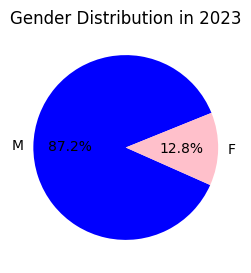

In [192]:
# Pie chart of Gender Distribution

plt.figure(figsize=(3, 3))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=22, colors=['blue', 'pink'])
plt.title("Gender Distribution in 2023")
plt.show()

In [193]:
# Fonction return astrologique sign :-)

df["birthMonth"] = df["birthMonth"].fillna(0)
df["birthDay"] = df["birthDay"].fillna(0)


def calcul_astrological_signs(col):
    month = col['birthMonth']
    day = col['birthDay']
    if (month == 3 and 21 <= day <= 31) or (month == 4 and 1 <= day <= 19):
        return 'Aries'
    elif (month == 4 and 20 <= day <= 30) or (month == 5 and 1 <= day <= 20):
        return 'Taurus'
    elif (month == 5 and 21 <= day <= 31) or (month == 6 and 1 <= day <= 20):
        return 'Gemini'
    elif (month == 6 and 21 <= day <= 30) or (month == 7 and 1 <= day <= 22):
        return 'Cancer'
    elif (month == 7 and 23 <= day <= 31) or (month == 8 and 1 <= day <= 22):
        return 'Leo'
    elif (month == 8 and 23 <= day <= 31) or (month == 9 and 1 <= day <= 22):
        return 'Virgo'
    elif (month == 9 and 23 <= day <= 30) or (month == 10 and 1 <= day <= 22):
        return 'Libra'
    elif (month == 10 and 23 <= day <= 31) or (month == 11 and 1 <= day <= 21):
        return 'Scorpio'
    elif (month == 11 and 22 <= day <= 30) or (month == 12 and 1 <= day <= 21):
        return 'Sagittarius'
    elif (month == 12 and 22 <= day <= 31) or (month == 1 and 1 <= day <= 19):
        return 'Capricorn'
    elif (month == 1 and 20 <= day <= 31) or (month == 2 and 1 <= day <= 18):
        return 'Aquarius'
    else:
        return 'Pisces in'

df["astrological_signs"] = df.apply(calcul_astrological_signs, axis = 1)
df.head()

,rank,finalWorth,category,personName,country,city,source,industries,countryOfCitizenship,organization,...,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,actual_age,astrological_signs
0,1,211000,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,74.0,Pisces in
1,2,180000,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,52.0,Cancer
2,3,114000,Technology,Jeff Bezos,United States,Medina,Amazon,Technology,United States,Amazon,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,59.0,Capricorn
3,4,107000,Technology,Larry Ellison,United States,Lanai,Oracle,Technology,United States,Oracle,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,79.0,Leo
4,5,106000,Finance & Investments,Warren Buffett,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,93.0,Virgo


In [194]:
# I have % of sign and i have clean the NAN present on the date. i need to find a graph to show()

astrological_signs_count = df["astrological_signs"].value_counts(normalize = True)*100
# astrological_signs_count = df["astrological_signs"].value_counts()

astrological_signs_count_print = astrological_signs_count.round(2)
print(astrological_signs_count_print)

Capricorn      20.64
Pisces in       9.73
Virgo           7.95
Leo             7.61
Aries           7.42
Libra           7.42
Cancer          7.05
Gemini          6.70
Sagittarius     6.59
Taurus          6.40
Aquarius        6.25
Scorpio         6.21
Name: astrological_signs, dtype: float64


ValueError: ignored